# **Hey there!**

## **This notebook dives into A/B testing with sales data – exciting stuff! Let's break down the tools I've set up at the beginning.**

In [101]:
import pandas as pd
import numpy as np
from datetime import *
import matplotlib.pyplot as plt
import seaborn as sns

Like before, I've got pandas as pd for my data wrangling needs. I'll likely have columns representing things like the version of the sales page a customer saw (either A or B), purchase amounts, and maybe even timestamps for the transactions.

numpy as np will come in handy for calculations. I might want to find the average purchase value, total sales, or conversion rates for each test variation.

Since we're dealing with sales over time, I've imported the datetime module. I might break down the sales data by day, week, or month depending on the timeframe of my A/B test.

Of course, I've got matplotlib.pyplot as plt and seaborn as sns for visualization.  It's time to make some comparisons! Histograms might be useful to see the distribution of purchase amounts for each variation, or line plots could show trends in conversion rates throughout the test.

Crucially, I'll need some statistical tools to determine if the differences between my A and B versions are significant. I might bring in SciPy or Statsmodels libraries for this part later on!

Let's see what the data loading and analysis looks like!

In [102]:
control_df=pd.read_csv('https://raw.githubusercontent.com/Aditya260698/AB-Testing-Project/main/control_group.csv', sep=';')
test_df=pd.read_csv('https://raw.githubusercontent.com/Aditya260698/AB-Testing-Project/main/test_group.csv', sep=';')

Ok, first things first, let's get my hands on the data! I have those CSV files hosted on GitHub that contain the details for my control group and my test group.

With pd.read_csv, I can load those files straight from the URLs and into DataFrames.  I'm calling one control_df and the other test_df.  I had to use sep=';' because these files are a little different; they use semicolons to divide the data instead of the usual commas.

Now I've got the data organized, which is great, but I still need to see what's actually inside, what sort of information they hold. That's where things like .head() and .info() will come in handy later to give me a peek at the columns and structure!

Let me know if you'd like me to walk you through the next steps I usually take for A/B testing analysis! It'll involve digging into the data and then performing statistical tests to see if my test variation made a real difference.

In [103]:
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [105]:
control_df.columns = ["Campaign Name",	"Date",	"Amount Spent", "Number of Impressions", "Reach", "Website Clicks", "Searches Received",	"Content Viewed", "Added to Cart",	"Purchases"]

In [106]:
test_df.columns = ["Campaign Name",	"Date",	"Amount Spent", "Number of Impressions", "Reach", "Website Clicks", "Searches Received",	"Content Viewed", "Added to Cart",	"Purchases"]

Great! Now I've added descriptive column names to both control_df and test_df. This looks like a classic sales funnel setup:

Campaign Name: Indicates the different advertising campaigns I am testing.
Date: The date the data point represents.
Amount Spent: Advertising spending.
Number of Impressions: How many times the ads were shown.
Reach: How many people were exposed to the ads.
Website Clicks: Clicks on the ads leading to the website.
Searches Received: This measures related searches triggered by the ads.
Content Viewed: Activity on the website after people click through.
Added to Cart: Getting closer to a sale!
Purchases: The ultimate goal, this is what I'm hoping to influence with the A/B test.
This all aligns nicely with a typical A/B testing analysis. I'll be looking to see if there are differences in website clicks, content viewed, added to cart, and ultimately purchases between the control and test campaigns.

In [107]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          30 non-null     object 
 1   Date                   30 non-null     object 
 2   Amount Spent           30 non-null     int64  
 3   Number of Impressions  29 non-null     float64
 4   Reach                  29 non-null     float64
 5   Website Clicks         29 non-null     float64
 6   Searches Received      29 non-null     float64
 7   Content Viewed         29 non-null     float64
 8   Added to Cart          29 non-null     float64
 9   Purchases              29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [108]:
control_df.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [109]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign Name          30 non-null     object
 1   Date                   30 non-null     object
 2   Amount Spent           30 non-null     int64 
 3   Number of Impressions  30 non-null     int64 
 4   Reach                  30 non-null     int64 
 5   Website Clicks         30 non-null     int64 
 6   Searches Received      30 non-null     int64 
 7   Content Viewed         30 non-null     int64 
 8   Added to Cart          30 non-null     int64 
 9   Purchases              30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [110]:
test_df.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

Both control_df and test_df have 30 rows and 10 columns. It looks like there are some missing values in both DataFrames.  Let's take a closer look at how many are missing using control_df.isnull().sum().

I see! There is one missing value each in 'Number of Impressions', 'Reach', 'Website Clicks', 'Searches Received', 'Content Viewed', 'Added to Cart', and 'Purchases' columns in the control_df. Thankfully, there are no missing values in the 'Campaign Name' or 'Date' columns!

Great, now we know a little more about the structure of our data.  In the next steps we can start to get a better understanding of what the data points themselves look like by using descriptive statistics methods!

In [111]:
#Fill the null values by taking mean of the attributes in control_df

for column in control_df.columns:
  if control_df[column].isnull().any():
    control_df[column] = control_df[column].fillna(control_df[column].mean())


Iteration:

for column in control_df.columns: This line sets up a loop to iterate through each column name in your control_df DataFrame.
Missing Check:

if control_df[column].isnull().any(): Within the loop, this line checks if the current column (column) has any missing values (represented by NaN or Null).
Imputation with Mean:

control_df[column] = control_df[column].fillna(control_df[column].mean())
If there are missing values in the column:
control_df[column].mean() calculates the mean (average) of the non-null values in that column.
control_df[column].fillna(...) replaces all the missing values in that column with the calculated mean.
Overall Effect

This code effectively fills in the missing values in each column of your control_df with the mean of the existing values in that column. This is one common method of handling missing data.

Important Considerations

Alternative Methods: While using the mean is a quick fix, consider other imputation techniques like median or using more sophisticated models to predict missing values based on other data points. The best method depends on your data's distribution and the nature of missingness.

Impact on Analysis: Imputation affects your analysis. Be aware that filling in values with averages can reduce the variability in your data and potentially influence the A/B test results.

In [112]:
control_df.isnull().sum().sum()

0

In [113]:
control_df.describe(include=[int,float])

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [114]:
test_df.describe(include=[int,float])

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [115]:
ab_test_df = pd.concat([control_df,test_df]).sort_values('Date').reset_index()
ab_test_df.drop('index',inplace=True,axis=1)

1. Concatenation:

pd.concat([control_df,test_df])
This takes your control_df (which now has missing values filled) and your test_df DataFrames and joins them together, likely along the rows (axis=0).
The result is a longer DataFrame containing the data from both groups for your A/B test.
2. Sorting:

.sort_values('Date')
This reorders the combined DataFrame based on the values in the 'Date' column. This is probably important since you'll likely be analyzing your sales data over time.
3. Resetting the Index:

.reset_index()
After concatenation and sorting, the index of your DataFrame might have gaps or duplicates. This function reassigns a clean, sequential index starting from 0.
4. Dropping a Column:

.drop('index',inplace=True,axis=1)
inplace=True modifies the ab_test_df DataFrame directly.
axis=1 specifies you're dropping a column (as opposed to a row).
This is likely removing the old index column that was created before the re-indexing.
In Summary

You've created a new DataFrame called ab_test_df, containing the combined and cleaned data from your control and test campaigns. It's now sorted by date and ready for further analysis!

In [116]:
ab_test_df.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


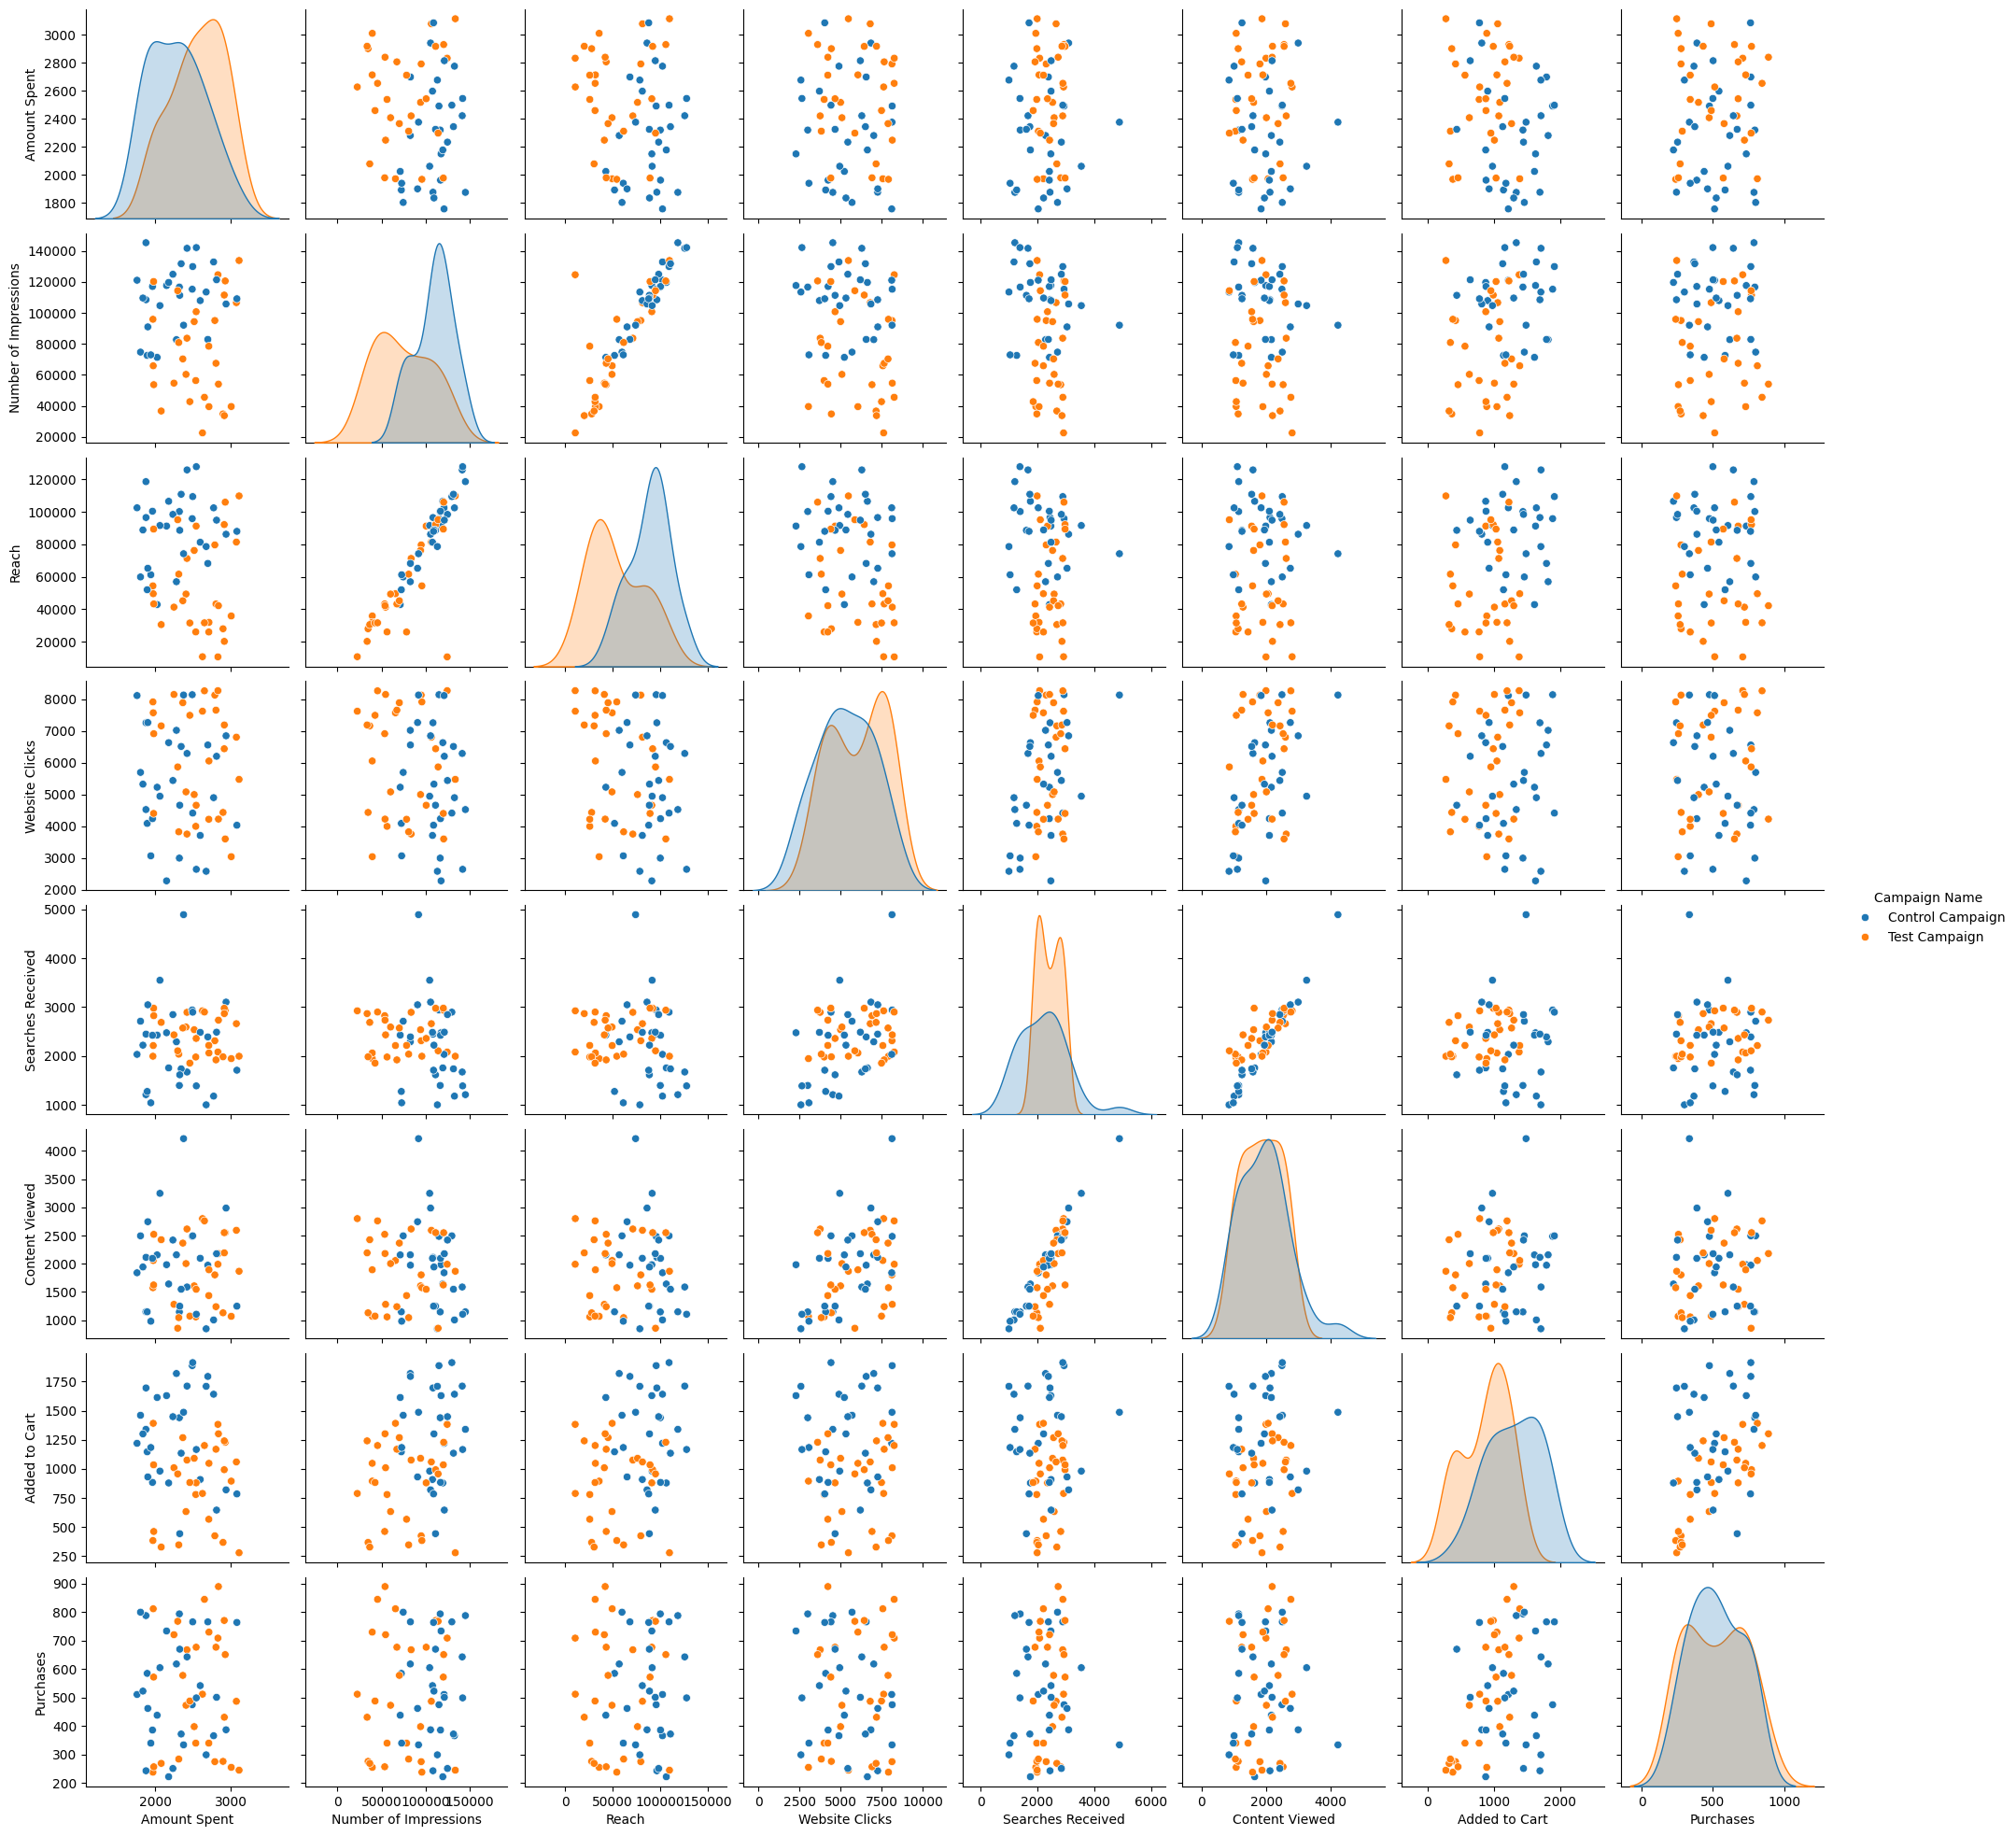

In [117]:
sns.pairplot(ab_test_df,hue="Campaign Name")

Let's visualize some of this data. I'm using Seaborn's pairplot to see how my various metrics compare between the different campaigns.  The hue="Campaign Name" part means I'll have the data points color-coded based on which campaign they belong to (control or test).

Pairplots are a pretty handy tool for A/B testing.   They let me see relationships between multiple continuous variables at once, and the color separation will help me spot any clear differences in distributions between my two test groups.

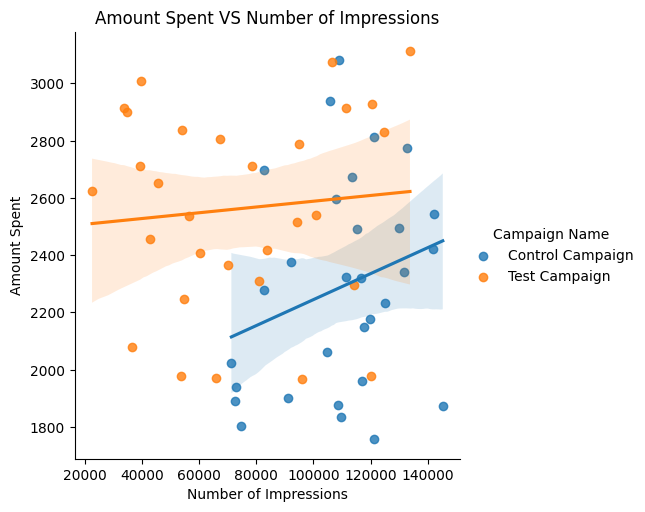

In [118]:
sns.lmplot(data=ab_test_df,x='Number of Impressions',y='Amount Spent',hue='Campaign Name')
plt.title("Amount Spent VS Number of Impressions")
plt.show()

Okay, looks like I'm digging deeper! Here's my thought process with that code:

Focus: I'm using sns.lmplot from Seaborn to create a scatterplot specifically focused on how the "Amount Spent" varies depending on the "Number of Impressions" I got for each campaign.

Relationship: Since I'm comparing two continuous variables, a scatterplot makes sense. lmplot is cool because it also fits a linear regression line to help visualize any trend between the variables.

Separation:  The hue='Campaign Name' again means I'll see separate scatter points and regression lines for my control and test campaigns.  This is essential for A/B testing!

Title:  I've added a descriptive title with plt.title() to make it clear what the plot represents.

Expectation: I'm curious if I'll see different spending patterns across campaigns for the same number of impressions. This could tell me if one campaign is more expensive than the other, or potentially indicate differences in how the ads are targeted.

In [130]:
reach=ab_test_df[['Campaign Name','Reach']].groupby('Campaign Name').sum('Reach').reset_index()

Alright, I think I'm calculating the total reach for each of my campaigns. Here's how that code snippet does it:

Selecting Columns:

ab_test_df[['Campaign Name','Reach']] This isolates the two essential columns from my DataFrame: the name of the campaign and the corresponding reach numbers.
Grouping:

.groupby('Campaign Name') This tells pandas to group the data together based on the unique values in my 'Campaign Name' column.
Aggregation:

.sum('Reach') Now, within each group (control and test), this line calculates the sum of all the 'Reach' values for that campaign.
Resetting Index:

.reset_index() After grouping and summing, the 'Campaign Name' becomes the index. This line transforms it back into a regular column.

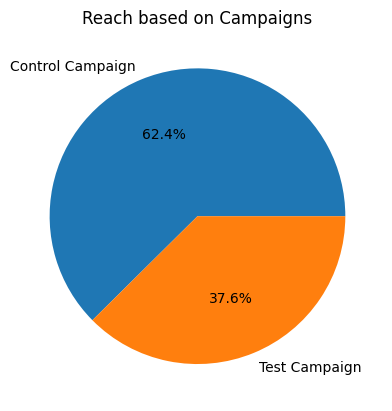

In [120]:
plt.pie(x=reach['Reach'].tolist(),labels=reach['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Reach based on Campaigns')
plt.show()

I'm using a pie chart to visualize the relative reach of my campaigns. Here's how that code achieves this:

Data Preparation:

reach['Reach'].tolist() Extracts the values in the 'Reach' column and converts them into a list, a format suitable for the pie chart.
reach['Campaign Name'].tolist() Similarly, this extracts the campaign names as a list, ready to be used as labels.
Pie Chart Creation:

plt.pie(x=...labels=..., autopct='%1.1f%%') This creates the pie chart:
The x argument determines the size of each slice based on the reach values.
The labels argument assigns textual labels to each slice.
autopct='%1.1f%%' automatically displays the percentage contribution of each slice, formatted with one decimal place.
Title:

plt.title('Reach based on Campaigns') I add a clear title to the plot.
Why a Pie Chart?

Pie charts are excellent for showing parts-of-a-whole relationships. In this case, I can easily see the proportion of the total reach that was achieved by each campaign.

In [132]:
clicks=ab_test_df[['Campaign Name','Website Clicks']].groupby('Campaign Name').sum('Website Clicks').reset_index()

Website Click Comparison

Let's see how website clicks fared between the control and test campaigns.  I can calculate the total website clicks for each campaign by grouping the data by 'Campaign Name' and summing the clicks within each group.

Now, let's visualize the click distribution with a pie chart. This will show the proportion of website clicks received by each campaign.

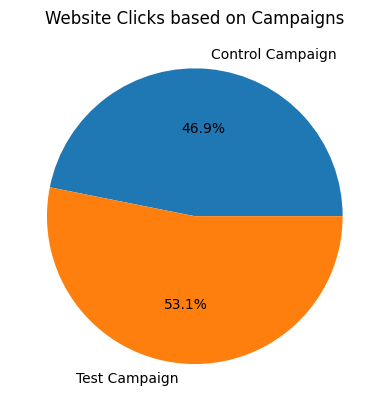

In [122]:
plt.pie(x=clicks['Website Clicks'].tolist(),labels=clicks['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Website Clicks based on Campaigns')
plt.show()



Interesting! The pie chart reveals that the test campaign captured a slightly higher percentage (53.1%) of website clicks compared to the control campaign (46.9%). While this is encouraging, it's important to remember that clicks don't necessarily translate directly to sales.

To get a more complete picture, I'll need to analyze other metrics further down the sales funnel, such as content viewed, items added to cart, and ultimately, purchases. This will provide a clearer understanding of how users navigate the sales funnel for each campaign variant

In [133]:
search=ab_test_df[['Campaign Name','Searches Received']].groupby('Campaign Name').sum('Searches Received').reset_index()

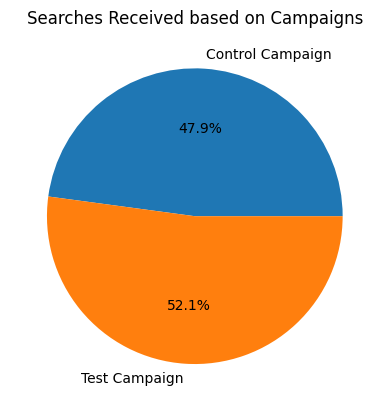

In [124]:
plt.pie(x=search['Searches Received'].tolist(),labels=search['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Searches Received based on Campaigns')
plt.show()

In [125]:
content=ab_test_df[['Campaign Name','Content Viewed']].groupby('Campaign Name').sum('Content Viewed').reset_index()


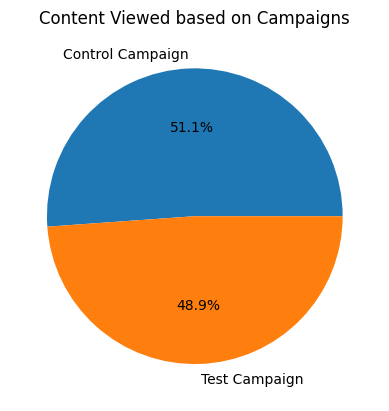

In [126]:
plt.pie(x=content['Content Viewed'].tolist(),labels=content['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Content Viewed based on Campaigns')
plt.show()


Observations

It seems like my test campaign is doing slightly better at triggering searches!  According to the pie chart, it accounts for 52.1% of the searches generated, compared to 47.9% for my control campaign.  This might mean my test ads are better at reaching the right people, or maybe the messaging is just more compelling than the control version.

Important Considerations

Search Quality: It's key to remember that I need to look beyond just the number of searches. What people are actually searching for is really important – some searches might show a stronger interest in buying than others.
Correlation with Results: More searches are a good sign, but they don't guarantee more sales. I need to follow this further down the funnel and see how this search activity translates into clicks on my website, content views, and hopefully, actual purchases.


In [127]:
cart=ab_test_df[['Campaign Name','Added to Cart']].groupby('Campaign Name').sum('Added to Cart').reset_index()


Cart Analysis

Step 1:  Focus on Carts

Like before, I start by grabbing only the 'Campaign Name' and 'Added to Cart' columns from the ab_test_df.
Then, I group the data based on the campaign name and sum up all instances where items were added to the cart for each campaign.

Step 2:  Pie Chart Visualization

Another pie chart! This lets me compare the relative proportion of "Added to Cart" events triggered by my control vs. test campaigns.
plt.title('Added to Cart based on Campaigns') sets a clear title for my analysis.

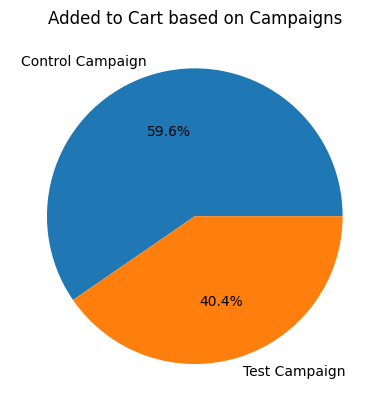

In [128]:
plt.pie(x=cart['Added to Cart'].tolist(),labels=cart['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Added to Cart based on Campaigns')
plt.show()

This result is unexpected! It appears that the control campaign generated a significantly higher proportion of "Added to Cart" events (59.6%) compared to the test campaign (40.4%). Here's how I might incorporate this finding into my analysis:

Observation

Surprisingly, the control campaign seems to be outperforming the test campaign when it comes to getting people to add items to their carts.  This is counterintuitive, especially considering the test campaign had an edge in both website clicks and searches received.

Possible Explanations

Friction in the Test Funnel: There might be something in my test campaign's website experience that's discouraging people at the cart stage.  Maybe the product pages aren't as clear, the pricing is confusing, or the checkout process has more steps than the control.

Messaging Disconnect:  My test campaign may have generated clicks and searches, but if the ad messaging doesn't align well with what people find on the landing page, they may be less likely to add to the cart.

Cart Abandonment:  There's always a chance that random factors lead to more abandoned carts on a particular day. If my sample size is small, the data might be misleading.

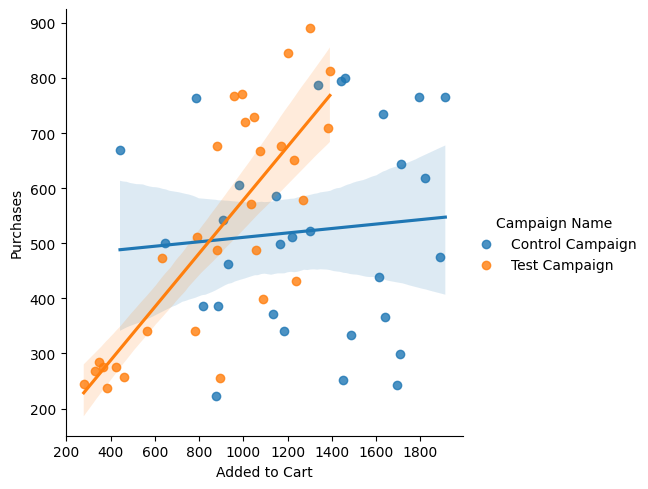

In [129]:
sns.lmplot(data=ab_test_df,x='Added to Cart',y='Purchases',hue='Campaign Name')

This scatterplot looks like it'll be very revealing! Here's how I understand the code and the insights it will provide:

Focus: I'm using sns.lmplot to examine the relationship between the number of times people added items to their cart ("Added to Cart") and the number of actual purchases ("Purchases"). This will help me see how well each campaign converts interest into sales.

Campaign Comparison: As always, the hue='Campaign Name'  is crucial. Seaborn will plot the points and regression lines separately for my control and test campaigns, allowing me to visualize any differences in conversion patterns.

The analysis of the plot reveals that in the Control Campaign, although more products are added to the cart, they aren't necessarily purchased. On the other hand, in the Test Campaign, fewer products are added to the cart, but a higher percentage of them are actually bought. This suggests a strong positive correlation between adding products to the cart and making a purchase, as indicated by the linear trend in the plot.

In conclusion, the Test Campaign outperforms the Control Campaign in terms of conversion rate. While the Control Campaign generates more impressions, reaches a wider audience, and leads to more products being added to the cart, the Test Campaign focuses on driving actual purchases. Ultimately, sales and revenue are paramount. The Test Campaign can be leveraged for personalized marketing strategies, targeting specific products to specific audiences based on their behaviors and demographics, whereas the Control Campaign serves better for broader marketing efforts.